In [44]:
#Подготовка изображения
import cv2

img=cv2.imread('Images/Incredible.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
#Пороговая сегментация изображения
import cv2

img=cv2.imread('Images/Incredible.jpg')
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
(T,binary_img) = cv2.threshold(imgGray, 127,255,cv2.THRESH_BINARY)
cv2.imshow('img', binary_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('Images/lab5/binary_img.png',binary_img)

True

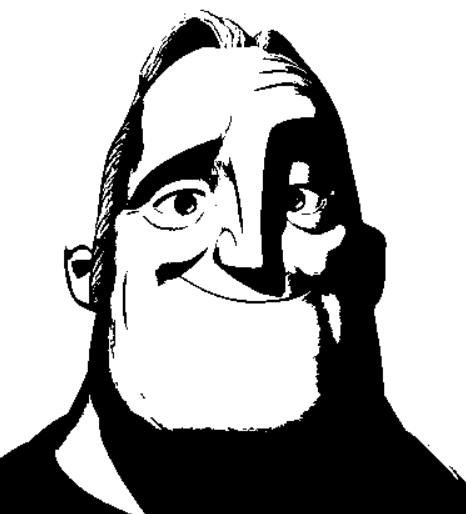

In [50]:
#Двухпороговая сегментация изображения
import cv2
import numpy as np

img=cv2.imread('Images/Incredible.jpg')
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def double_threshold(img,tr1,tr2):
    output=np.zeros(img.shape)
    value=np.ceil((tr1+tr2)/2)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j]<tr1:
                output[i,j]=0
            elif  img[i,j]>tr1 and img[i,j]<tr2:
                output[i,j]=value
            else:
                output[i,j]=255
    return np.array(output,dtype=np.uint8)
double_threshold_img = double_threshold(imgGray,85,170)

cv2.imshow('img', double_threshold_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('Images/lab5/double_threshold_img.png',double_threshold_img)

True

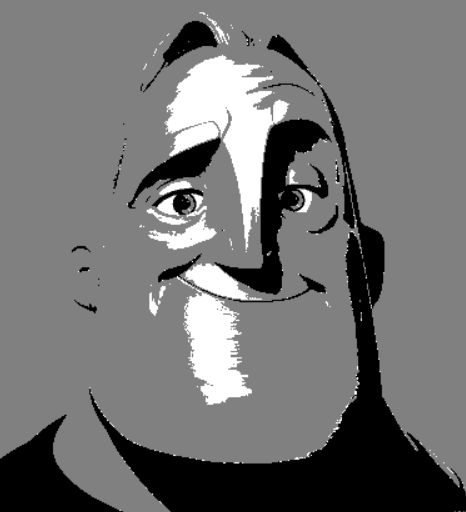

In [51]:
#Сегментация изображения с глобальным порогом
import cv2
import numpy as np

img=cv2.imread('Images/Incredible.jpg')
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def global_threshold(img,tr):
    eps = 1
    e = 2
    m1,m2,k1,k2 = 0,0,1,1
    while e> eps:      
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if img[i,j] == 0:
                    m1+=img[i,j]
                    k1+=1
                else:
                    m2+=img[i,j]
                    k2+=1
        tr_new = (m1/k1+m2/k2)/2
        e = abs(tr-tr_new)
        tr = tr_new
    return tr
tresh=global_threshold(imgGray, 127)
print(tresh)

59.99004235046694


In [52]:
(T,global_treshold_img) = cv2.threshold(imgGray, tresh,255,cv2.THRESH_BINARY)
cv2.imshow('img', global_treshold_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('Images/lab5/global_treshold_img.png',global_treshold_img)

True

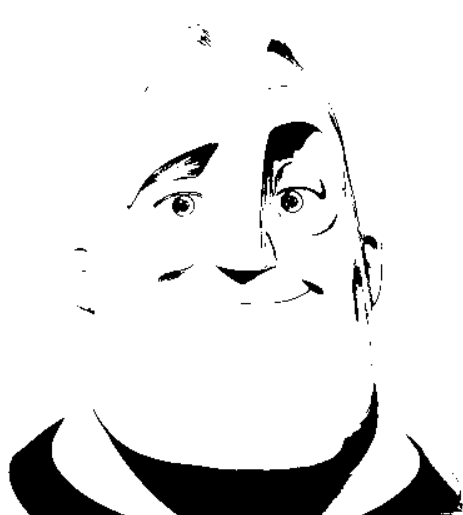

In [53]:
#Сегментация изображения методом Оцу
import cv2

img=cv2.imread('Images/Incredible.jpg')
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret2,otsu_img = cv2.threshold(imgGray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imshow('img', otsu_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('Images/lab5/otsu_img.png',otsu_img)

True

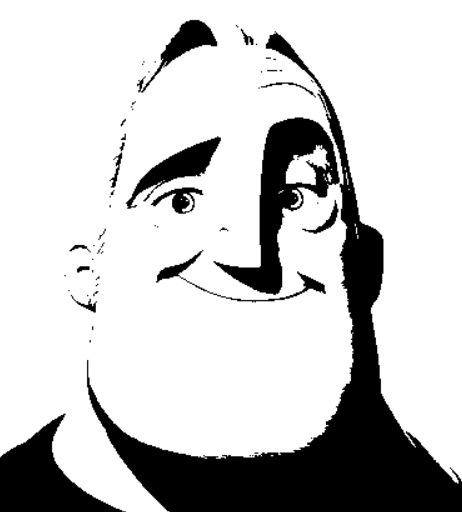